<a href="https://colab.research.google.com/github/rendirmnsyh/desain/blob/main/Copy_of_pertemuan_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# first two terms
n1 , n2 = 0, 1
count = 0

# check if the number of terms is valid
if nterms <= 0:
  print("please enter a positve integer")
elif nterms == 1:
  print("Fibonacci sequence upto",nterms,":")
  print(n1)
else:
  print("Fibonacci sequence:")
  while count < nterms:
    print(n1)
    nth = n1 + n2
    # update values
    n1 = n2
    n2 = nth
    count += 1


Fibonacci sequence:
0
1
1
2
3
5
8
13
21
34
55
89


In [ ]:
#Fibbonacci dengan while
nterms = int(input("How many terms? "))
n1, n2 = 0, 1
count = 0

if nterms <= 0:
  print("please enter a positive integer")
elif nterms == 1:
  print("Fibonacci sequence upto ",nterms,":")
  print(n1)
else:
  print("Fibonacci sequence:")
  while count < nterms:
    print(n1)
    nth = n1+n2
    #update nilai
    n1 = n2
    n2 = nth
    count += 1

How many terms? 12
Fibonacci sequence:
0
1
1
2
3
5
8
13
21
34
55
89


In [ ]:
#Fibonacci dengan rekursi

def recur_fibo(n):
  if n <= 1:
    return n
  else:
     return(recur_fibo(n-1) + recur_fibo(n-2))

nterms = 20

# cek apakah nilai nterms valid
if nterms <= 0:
  print("please enter a positive integer")
else:
  print("Fibonacci sequence:")
  for i in range(nterms):
    print(recur_fibo(1))

Fibonacci sequence:
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import random
import time
import itertools

In [ ]:
#Try all tours (exact_TSP)
def exact_TSP(cities):
  "Generate all possible tours of the cities and choose the shortest one."
  return shortest(alltours(cities))

def shortest(tours):
  "Return the tour with the minimum total distance."
  return min(tours, key=total_distance)


In [ ]:
#Representing Tours
alltours = itertools.permutations # The permutation function is already defind in the itertools module

cities = {1, 2, 3}

list(alltours(cities))


[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [ ]:
#Representing Cities and distance
def total_distance(tour):
  "The total distance between each pair of counsecutive cities in the tour."
  return sum(distance(tour[i], tour[i-1]) for i in range(len(tour)))

In [ ]:
city = complex # Constructor for anew cities, e.g. ciy(300, 400)

def distance(A, B):
  "The distance between two points."
  return abs(A - B)

In [ ]:
A = city(300,0)
B = city(0, 400)
distance(A, B)

500.0

In [ ]:
def cities(n):
  "Make a set of n cities, each with random coordinates."
  return set(city(random.randrange(10, 890), random.randrange(10, 590)) for c in range (n))

# let's make some standard sets of cities of various sizes.
# we'll set the random seed so that these set are the same every time we run this notebook.
random.seed('seed')
cities8, cities10, cities100, cities1000 = cities(8), cities(10), cities(100), cities(1000)
cities8

{(151+70j),
 (252+365j),
 (303+506j),
 (498+96j),
 (54+361j),
 (551+542j),
 (684+435j),
 (800+430j)}

In [ ]:
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

[(551+542j), (303+506j), (252+365j), (54+361j), (151+70j), (498+96j), (800+430j), (684+435j)]
1990.388372313552


In [ ]:
#Try all Non-Reduntant Tours
def alltours(cities):
  "Return a list of tours, each a permutation of cities, but each one starting with the same city."
  start = first(cities)
  return [[start] + list(tour)
          for tour in itertools.permutations(cities - {start})]
def first(collection):
  "start iterating over collection, and return the first element."
  for x in collection: return x

In [ ]:
alltours({1, 2, 3})


[[1, 2, 3], [1, 3, 2]]

In [ ]:
alltours({1, 2, 3, 4})

[[1, 2, 3, 4],
 [1, 2, 4, 3],
 [1, 3, 2, 4],
 [1, 3, 4, 2],
 [1, 4, 2, 3],
 [1, 4, 3, 2]]

In [ ]:
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

[(551+542j), (303+506j), (252+365j), (54+361j), (151+70j), (498+96j), (800+430j), (684+435j)]
1990.388372313552


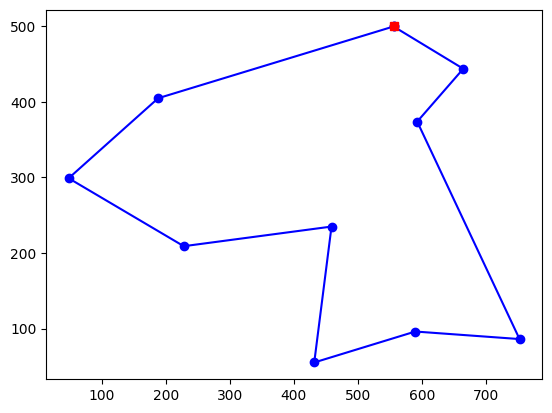

10 city tour; total distance = 2050.3; time = 1.887 secs for exact_TSP


In [ ]:
#plotting
import time
def plot_tour(algorithm, cities):
  "Apply a TSP algorithm to cities, and plot the resulting tour."
  # Find the solution and time how long it takes
  t0 = time.time()
  tour = algorithm(cities)
  t1 = time.time()
  # plot the tour as blue lines between blue circles, and the starting city as red square.
  plotline(list(tour) + [tour [0]])
  plotline([tour[0]], 'rs')
  plt.show()
  print("{} city tour; total distance = {:.1f}; time = {:.3f} secs for {}".format(
        len(tour), total_distance(tour), t1-t0, algorithm.__name__))

def plotline(points, style='bo-'):
  "Plot a list of points (complex numbers) in the 2-D plane."
  X, Y = XY(points)
  plt.plot(X, Y, style)

def XY(points):
  "Given a list of points, return two lists: X coordinates, and Y coordinates."
  return [p.real for p in points], [p.imag for p in points]

plot_tour(exact_TSP, cities10)

In [ ]:
#Greedy Nearest Neighbor (greedy_TSP)

def greedy_TSP(cities):
  "At each step, visit the nearest neighbor that is still unvisited."
  start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  while unvisited:
    c = nearest_neighbor(tour[-1], unvisited)
    tour.append(c)
    unvisited.remove(c)
  return tour

def nearest_neighbor(A, cities):
    "Find the city in cities that is nearest to city A."
    return min(cities, key=lambda x: distance(x, A))

In [ ]:
cities = Cities(9)
plot_tour(exact_TSP, cities)
plot_tour(greedy_TSP, cities)

NameError: ignored

In [ ]:
plot_tour(greedy_TSP, cities100)
plot_tour(greedy_TSP, cities1000)

NameError: ignored